In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

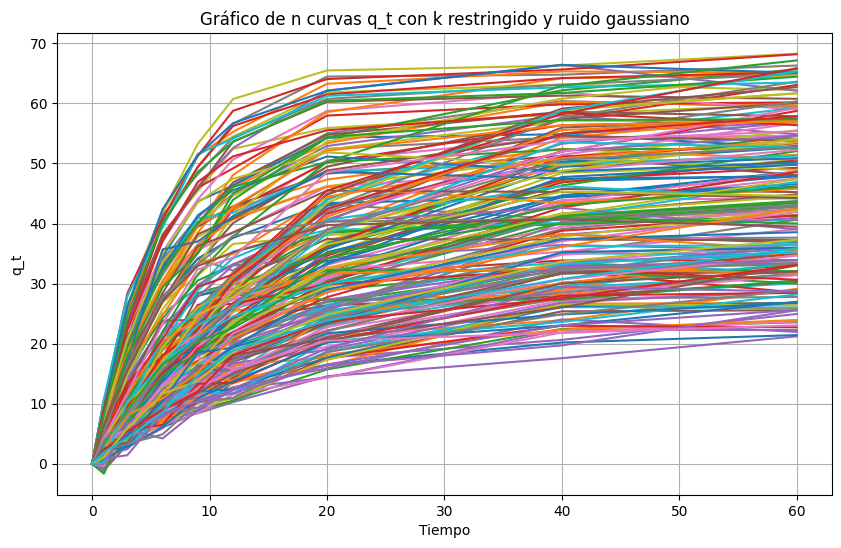

In [48]:
# Constantes
A, B, C = 4.2, 5.5, 10.2
D, Ea, R, F, n = 0.2, 50.0, 8.314, 0.1, 2.0
k_min, k_max = 0.055, 0.17  # Restricción de k

# Función del modelo pseudo-segundo orden
def modelo_pseudo_n(t, qe, k):
    return qe * (1 - np.exp(- k * t))

# Cálculo de qe basado en C0 y pH
def calcular_qe(C0, pH):
    return A * C0 + B * pH + C

# Cálculo de k con restricción
def calcular_k(T, pH, C0):
    k = D * np.exp(-Ea / (R * T)) * (1 + F * pH) * C0**n
    return np.clip(k, k_min, k_max)  # Limitar k dentro del rango deseado

# Crear un array de tiempo y configurar el número de curvas
time_array = np.array([0,1,3,6,9,12,20,40,60])
n_curvas = 200

# Crear la figura
plt.figure(figsize=(10, 6))

q_ts = []
C0s = []
pHs = []
Ts = []


# Generar y graficar n_curvas
for i in range(n_curvas):
    C0 = np.random.uniform(0.001, 0.87)
    pH = np.random.uniform(2, 10)
    T = np.random.uniform(291.15, 303.15)

    qe = calcular_qe(C0, pH)
    k = calcular_k(T, pH, C0)
    q_t = modelo_pseudo_n(time_array, qe, k)

    # Agregar ruido gaussiano a partir del segundo elemento
    noise = np.random.normal(0, 1.3, size=len(q_t))
    q_t[1:] = q_t[1:] + noise[1:]


    q_ts.append(q_t)
    C0s.append(C0)
    pHs.append(pH)
    Ts.append(T)

    # Graficar cada curva
    plt.plot(time_array, q_t)


# Configuración del gráfico
plt.xlabel('Tiempo')
plt.ylabel('q_t')
plt.title('Gráfico de n curvas q_t con k restringido y ruido gaussiano')
plt.grid(True)
plt.show()

In [49]:
data = {'q_t' : q_ts , 'C0': C0s, 'pH': pHs, 'T':Ts }
df_data = pd.DataFrame(data)
df_data

,q_t,C0,pH,T
0,"[0.0, 0.7006873997287548, 9.04391344888484, 14...",0.446373,6.930254,292.163823
1,"[0.0, 3.4983033452136327, 8.92227815755451, 17...",0.738497,3.040603,293.972513
2,"[0.0, -1.4992441216762833, 7.090115653507504, ...",0.130493,6.152651,293.774375
3,"[0.0, 2.2290692589485515, 10.294255809337217, ...",0.653966,3.685389,301.254942
4,"[0.0, 1.7359125431019014, 8.494461303675342, 1...",0.126445,9.165358,292.757935
...,...,...,...,...
195,"[0.0, 6.437749285144495, 15.503279254378427, 2...",0.734891,4.965255,301.418084
196,"[0.0, 4.204494950954812, 11.74884411018705, 23...",0.538519,7.322896,292.348487
197,"[0.0, 3.8352216688881287, 8.28038472076072, 15...",0.026476,8.208648,294.966215
198,"[0.0, 1.1162214844635363, 5.8876419079621245, ...",0.184068,4.855999,300.092918


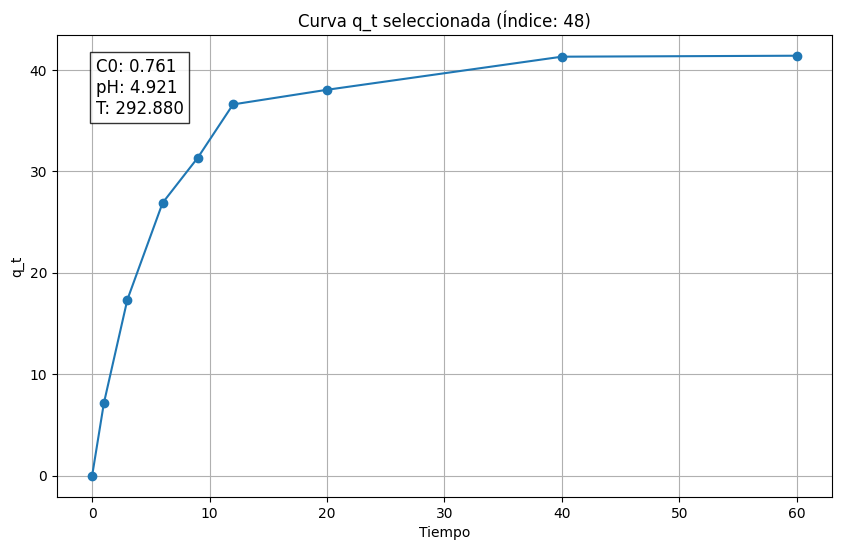

In [50]:
# Seleccionar un índice aleatorio para mostrar una curva
indice_a_mostrar = np.random.randint(0, len(df_data))

# Obtener los datos correspondientes al índice seleccionado
q_t_seleccionado = df_data['q_t'][indice_a_mostrar]
C0_seleccionado = df_data['C0'][indice_a_mostrar]
pH_seleccionado = df_data['pH'][indice_a_mostrar]
T_seleccionado = df_data['T'][indice_a_mostrar]

# Graficar la curva seleccionada
plt.figure(figsize=(10, 6))
plt.plot(time_array, q_t_seleccionado, marker='o', linestyle='-')  # Agrega marcadores y línea continua

# Agregar etiquetas y título al gráfico
plt.xlabel('Tiempo')
plt.ylabel('q_t')
plt.title(f'Curva q_t seleccionada (Índice: {indice_a_mostrar})')
plt.grid(True)

# Mostrar los valores correspondientes de C0, pH y T
plt.text(0.05, 0.95, f'C0: {C0_seleccionado:.3f}\npH: {pH_seleccionado:.3f}\nT: {T_seleccionado:.3f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))


plt.show()

In [51]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import models, layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

In [52]:
df_data[['C0', 'pH', 'T']]

,C0,pH,T
0,0.446373,6.930254,292.163823
1,0.738497,3.040603,293.972513
2,0.130493,6.152651,293.774375
3,0.653966,3.685389,301.254942
4,0.126445,9.165358,292.757935
...,...,...,...
195,0.734891,4.965255,301.418084
196,0.538519,7.322896,292.348487
197,0.026476,8.208648,294.966215
198,0.184068,4.855999,300.092918


In [53]:
#Escalar los datos
scalerX = MinMaxScaler()
X = scalerX.fit_transform(df_data[['C0', 'pH', 'T']])
Y = np.array(df_data['q_t'].tolist())


# transformer = FunctionTransformer(lambda x: x / np.max(x, axis=1, keepdims=True))
# Y_norm = transformer.fit_transform(Y)

Y_norm = Y / np.max(Y)

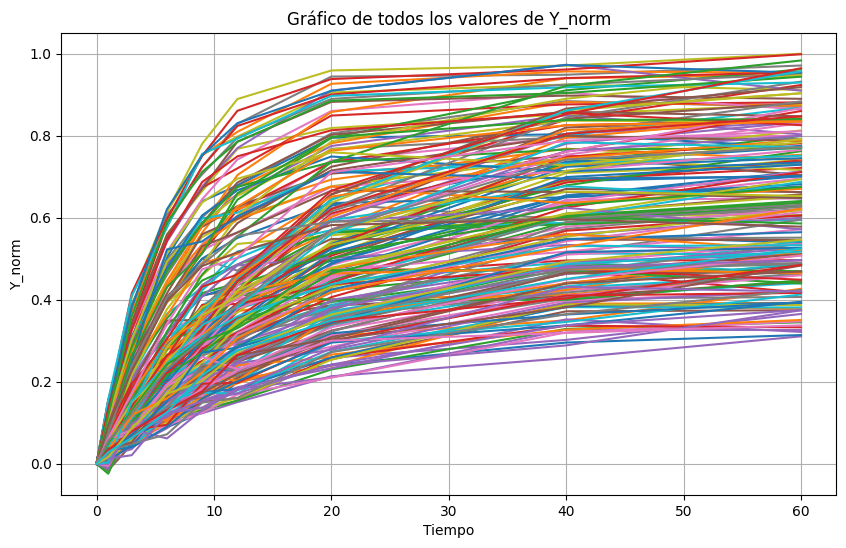

In [54]:
plt.figure(figsize=(10, 6))

for i in range(len(Y_norm)):
    plt.plot(time_array, Y_norm[i])

plt.xlabel('Tiempo')
plt.ylabel('Y_norm')
plt.title('Gráfico de todos los valores de Y_norm')
plt.grid(True)
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_norm, test_size=0.2, random_state=42)

In [64]:
#Definir el modelo
model = models.Sequential([
    layers.Input(shape=(3,)),  # 3 entradas
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])
#Funciona bastante bien para [16,12] y lr = 0.001

In [65]:

def modelo_pseudo_n(qe, k):
    t = tf.constant([0, 1, 3, 6, 9, 12, 20, 40, 60], dtype=tf.float32)
    return qe[:, tf.newaxis] * (1 - tf.exp(- k[:, tf.newaxis] * t))

def custom_loss(y_true, y_pred):
    # y_pred tendrá la forma (N, 2), donde cada columna es un parámetro de tu función
    qe = y_pred[:, 0]  # Primer parámetro (qe)
    k = y_pred[:, 1]  # Segundo parámetro (k)

    # Calcula los valores de la función usando los parámetros predichos
    func_value = modelo_pseudo_n(qe, k)


    # Calcula la diferencia entre los valores de la función y los experimentales
    loss = tf.reduce_mean(tf.square(func_value - y_true))
    return loss

def custom_metric(y_true, y_pred):
    # y_pred tiene la forma (N, 2), donde las dos columnas corresponden a los parámetros qe y k
    qe_true = y_true[:, 0]
    k_true = y_true[:, 1]

    qe_pred = y_pred[:, 0]
    k_pred = y_pred[:, 1]

    # Calcula el error relativo (puede ser absoluto o porcentaje)
    qe_error = tf.abs(qe_true - qe_pred)
    k_error = tf.abs(k_true - k_pred)

    # Calcula el error medio
    avg_error = tf.reduce_mean((qe_error + k_error) / 2.0)

    return avg_error



In [66]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001  # Prueba con valores más bajos si quieres un ajuste más fino
optimizer = Adam(learning_rate=learning_rate)


model.compile(optimizer=optimizer, loss=custom_loss, metrics=[custom_metric])

In [67]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - custom_metric: 0.0727 - loss: 40987.3633 - val_custom_metric: 0.0455 - val_loss: 0.1814
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - custom_metric: 0.0328 - loss: 0.1710 - val_custom_metric: 0.0329 - val_loss: 0.1901
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - custom_metric: 0.0352 - loss: 0.1766 - val_custom_metric: 0.0315 - val_loss: 0.1831
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - custom_metric: 0.0421 - loss: 0.1801 - val_custom_metric: 0.0350 - val_loss: 0.1754
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - custom_metric: 0.0481 - loss: 0.1594 - val_custom_metric: 0.0425 - val_loss: 0.1668
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - custom_metric: 0.0536 - loss: 0.1631 - val_custom_metric: 0.0535 - val_loss: 0.1565
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - custom_metric: 0.0658 - loss: 0.1467 - val_custom_metric: 0.0669 - val_loss: 0.1461
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

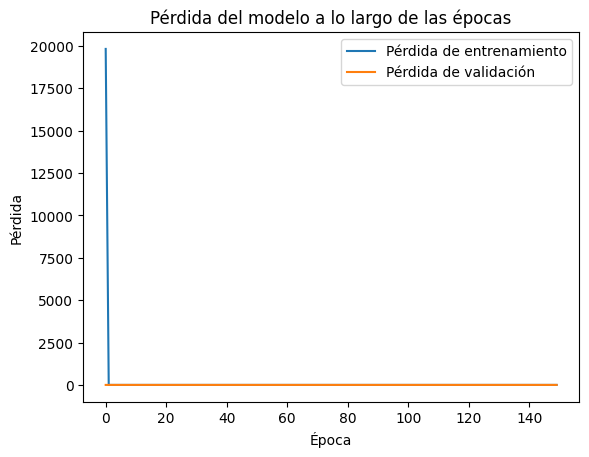

In [68]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo a lo largo de las épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

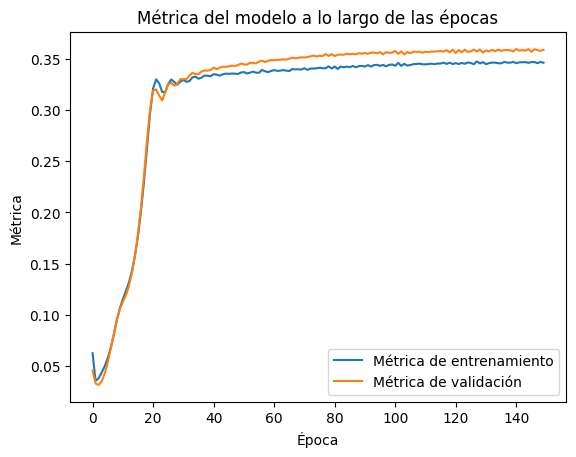

In [69]:
plt.plot(history.history['custom_metric'], label='Métrica de entrenamiento')
plt.plot(history.history['val_custom_metric'], label='Métrica de validación')
plt.title('Métrica del modelo a lo largo de las épocas')
plt.xlabel('Época')
plt.ylabel('Métrica')
plt.legend()
plt.show()

In [70]:
# Evaluar el modelo con los datos de prueba
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Pérdida en el conjunto de prueba: {test_loss}')

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

Pérdida en el conjunto de prueba: [0.0007124101393856108, 0.3587994873523712]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


12


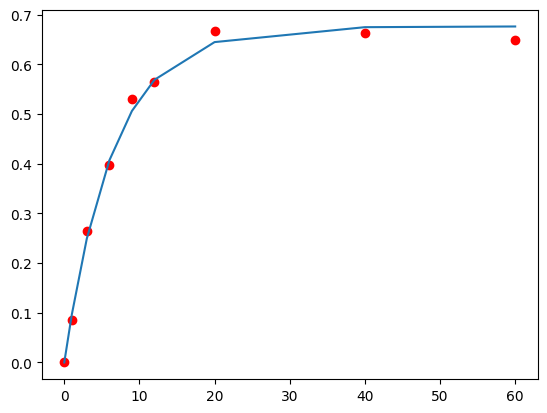

In [81]:
def modelo_pseudo_n(t, qe, k):
    return qe * (1 - np.exp(- k * t))

n=np.random.randint(0,len(y_test))

q_t_pred = modelo_pseudo_n(time_array, y_pred[n][0], y_pred[n][1])
plt.plot(time_array, q_t_pred)
plt.scatter(time_array, y_test[n], color='red')
print(n)

In [83]:
model.save('Modelo_200samples.keras')

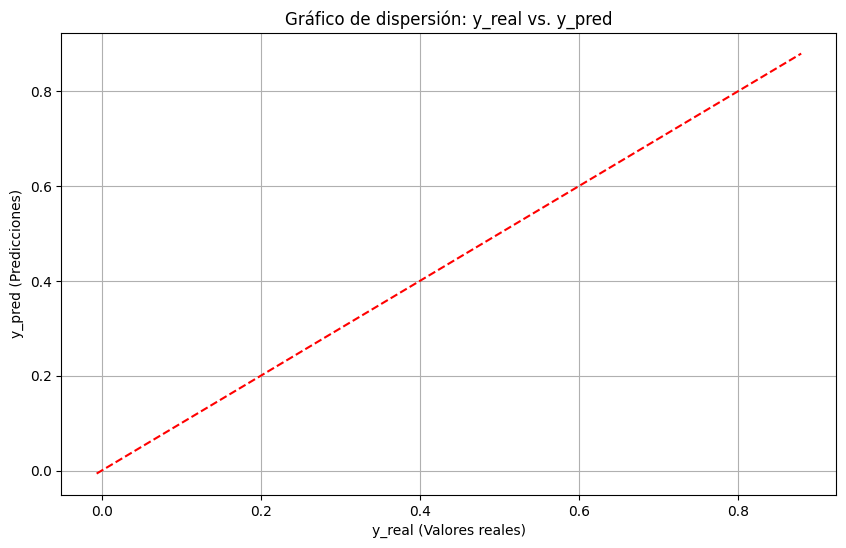

In [18]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test[0], q_t_pred)  # Graficar los puntos
plt.xlabel('y_real (Valores reales)')
plt.ylabel('y_pred (Predicciones)')
plt.title('Gráfico de dispersión: y_real vs. y_pred')
plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], color='red', linestyle='--') #Linea de referencia
plt.grid(True)
plt.show()

In [19]:
import pandas as pd
df_exp = pd.read_excel('Datos recogidos.xlsx')
df_exp

FileNotFoundError: [Errno 2] No such file or directory: 'Datos recogidos.xlsx'

In [ ]:
df_exp = pd.read_excel('Datos recogidos.xlsx')
df_exp['T0'] = np.zeros(len(df_exp))
df_tiempos = df_exp[['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6 ','T7 ','T8']]
df_tiempos

In [ ]:
df_exp = pd.read_excel('Datos recogidos.xlsx')
for i in range(len(df_exp)):
  data_exp = df_exp.iloc[i].iloc[2::]
  time_array = np.array([1,3,6,9,12,20,40,60])
  plt.plot(time_array,data_exp)

In [ ]:
df_exp['T0'] = np.zeros(len(df_exp))
df_tiempos = df_exp[['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6 ','T7 ']]

In [ ]:
np.array(df_tiempos.iloc[3])

In [ ]:
for i in range(len(df_tiempos)):
  data_exp = np.array(df_tiempos.iloc[i])
  time_array = np.array([0,1,3,6,9,12,20,40,60])
  plt.plot(time_array,data_exp)

In [ ]:
data_exp = np.array(df_tiempos.iloc[1])